<b> <h1> Data Understanding </h1>

In [5]:
#extract the MLPR dataset
!unzip "/content/brain_tumor.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [6]:
import os

In [7]:
#dataset path
dataset_path = "Training"

In [8]:
#list out the folder names

class_names = os.listdir(dataset_path)
class_names.sort()
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [9]:
print("Total Folders:",len(os.listdir(dataset_path)))

Total Folders: 4


In [10]:
number_classes = {}

In [11]:
for i in range(len(os.listdir(dataset_path))):
  #print(class_names[i])
  number_classes[class_names[i]] = len(os.listdir(dataset_path + "/"+ class_names[i]))

print(number_classes)

{'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}


In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
print("Total Images:",sum(number_classes.values()))

Total Images: 5712


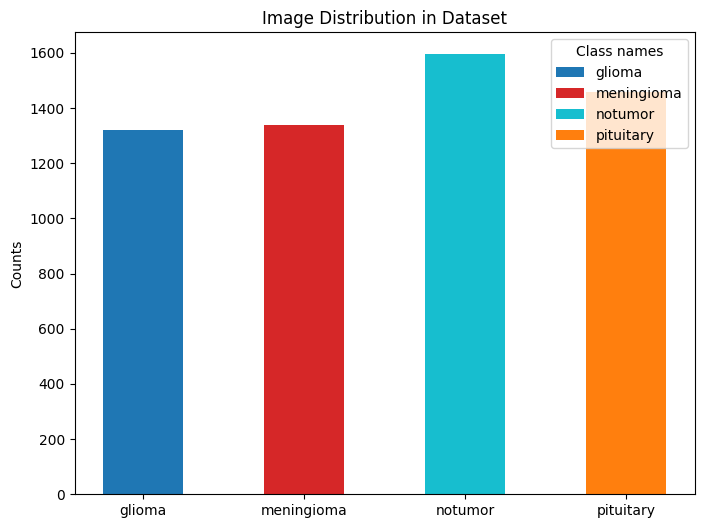

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

bar_colors = ['tab:blue', 'tab:red', 'tab:cyan', 'tab:orange','tab:green']

ax.bar(number_classes.keys(),number_classes.values(), label=number_classes.keys(), color=bar_colors,width = .5)
ax.set_ylabel('Counts')
ax.set_title('Image Distribution in Dataset')
ax.legend(title='Class names')

<b> <h1> Data Preparation
<h1/>

Training/glioma


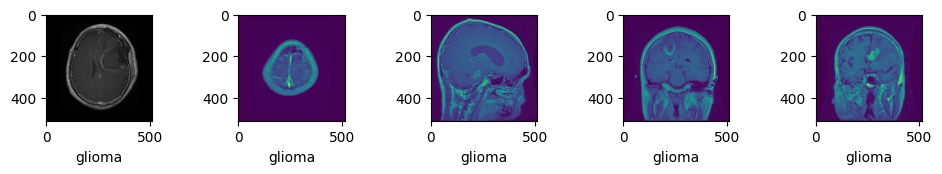

Training/meningioma


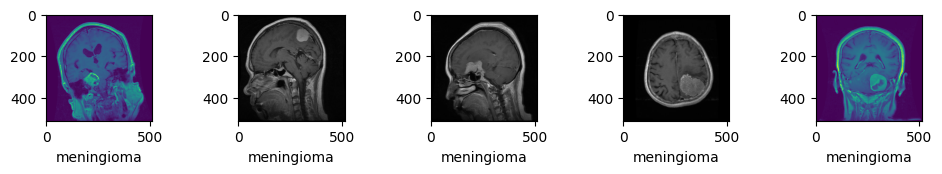

Training/notumor


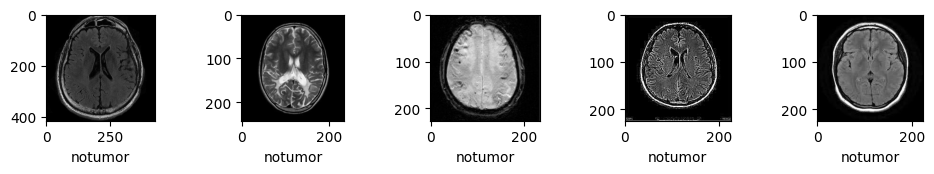

Training/pituitary


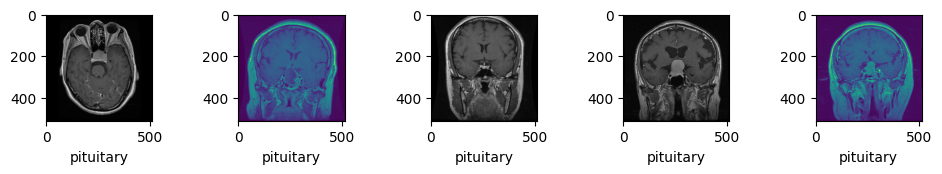

In [15]:
import random
import matplotlib.image as mpimg

col = 5
row = 5

for i in range(len(os.listdir(dataset_path))):
  path = dataset_path + "/"+ class_names[i]
  print(path)
  files=os.listdir(path)
  plt.figure(figsize=(12, 8))
  for j in range(1,6):
    d=random.choice(files)
    img = mpimg.imread(path + "/" + d)
    plt.subplot(row, col, j)
    plt.imshow(img)
    plt.xlabel(path.split("/")[1])
  plt.show()

In [16]:
import tensorflow as tf

img_height = 224
img_width = 224
batch_size = 16

dataset_path = "Training"

train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.


In [17]:
print(train_ds)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [18]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [19]:
class_names = train_ds.class_names
print(class_names)
type(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


list

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [21]:
normalization_layer = layers.Rescaling(1./255)

In [22]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [23]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

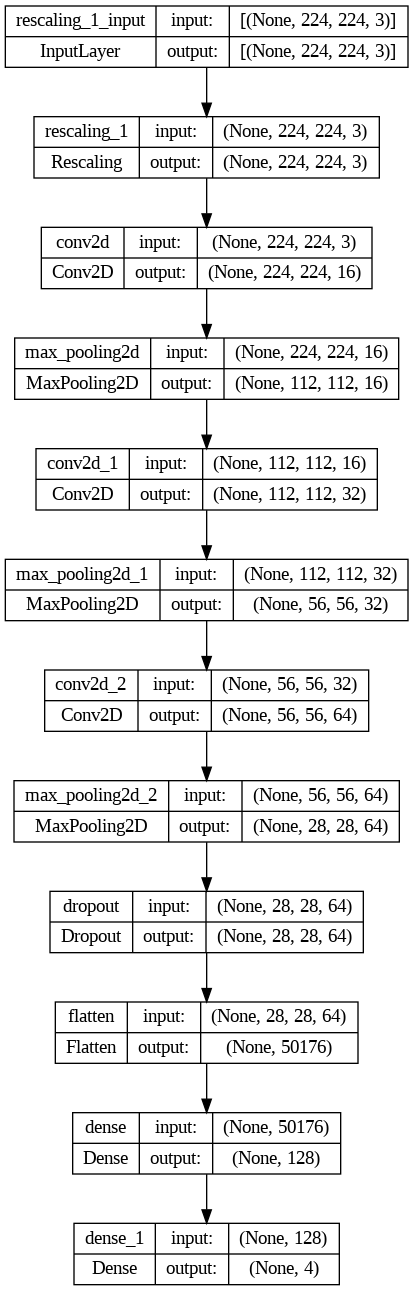

In [24]:
# Explore model visually
plot_model(model,show_shapes=True)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
epochs=10

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
286/286 [==============================] - 299s 1s/step - loss: 0.6253 - accuracy: 0.7488 - val_loss: 0.4440 - val_accuracy: 0.8468
Epoch 2/10
286/286 [==============================] - 316s 1s/step - loss: 0.2927 - accuracy: 0.8886 - val_loss: 0.2292 - val_accuracy: 0.9247
Epoch 3/10
286/286 [==============================] - 299s 1s/step - loss: 0.1429 - accuracy: 0.9451 - val_loss: 0.2674 - val_accuracy: 0.9168
Epoch 4/10
286/286 [==============================] - 318s 1s/step - loss: 0.0802 - accuracy: 0.9740 - val_loss: 0.3232 - val_accuracy: 0.9046
Epoch 5/10
286/286 [==============================] - 316s 1s/step - loss: 0.0532 - accuracy: 0.9805 - val_loss: 0.2644 - val_accuracy: 0.9326
Epoch 6/10
286/286 [==============================] - 318s 1s/step - loss: 0.0434 - accuracy: 0.9851 - val_loss: 0.3333 - val_accuracy: 0.9107
Epoch 7/10
286/286 [==============================] - 337s 1s/step - loss: 0.0234 - accuracy: 0.9912 - val_loss: 0.3658 - val_accuracy: 0.9229

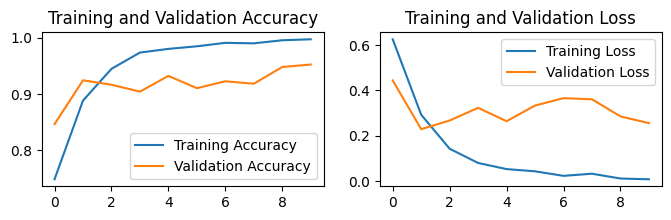

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 2))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
test_score = model.evaluate(val_ds)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

72/72 [==============================] - 23s 310ms/step - loss: 0.2557 - accuracy: 0.9527
[INFO] accuracy: 95.27%
[INFO] Loss:  0.25574028491973877


In [30]:
train_score = model.evaluate(train_ds)
print("[INFO] accuracy: {:.2f}%".format(train_score[1] * 100))
print("[INFO] Loss: ",train_score[0])

286/286 [==============================] - 90s 315ms/step - loss: 0.0016 - accuracy: 0.9998
[INFO] accuracy: 99.98%
[INFO] Loss:  0.001581793650984764


In [31]:
metrics = model.evaluate(val_ds)
print(f"Number of missclassified images in validation dataset: {int((1 - metrics[1]) * len(val_ds) * batch_size)} of {len(val_ds) * batch_size}")

72/72 [==============================] - 23s 312ms/step - loss: 0.2557 - accuracy: 0.9527
Number of missclassified images in validation dataset: 54 of 1152


In [32]:
metrics = model.evaluate(train_ds)
print(f"Number of missclassified images in Training dataset: {int((1 - metrics[1]) * len(train_ds) * batch_size)} of {len(train_ds) * batch_size}")

286/286 [==============================] - 90s 316ms/step - loss: 0.0016 - accuracy: 0.9998
Number of missclassified images in Training dataset: 1 of 4576


In [33]:
test_images = [] # images from test dataset
test_labels = [] # labels from test dataset
batches = []

for batch in val_ds.as_numpy_iterator():
    batches.append(batch)

for next_batch in batches:
    for image in next_batch[0]:
        test_images.append(image)
    for label in next_batch[1]:
        test_labels.append(label)

test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)
y_pred = np.array(model.predict(test_images))
y_true = np.array(test_labels)

36/36 [==============================] - 21s 563ms/step


In [34]:
pred_max = []
for x in y_pred:
    pred_max.append(np.argmax(x))
y_pred = pred_max

In [35]:
false_class = list()
true_class = list()
for i in range(len(test_images)):
    if y_pred[i] != y_true[i]:
        false_class.append((test_images[i],y_pred[i],y_true[i]))
    else:
        true_class.append((test_images[i],y_pred[i],y_true[i]))

              precision    recall  f1-score   support

      glioma       0.94      0.94      0.94       231
  meningioma       0.94      0.89      0.91       297
     notumor       0.97      0.99      0.98       321
   pituitary       0.96      0.99      0.97       293

    accuracy                           0.95      1142
   macro avg       0.95      0.95      0.95      1142
weighted avg       0.95      0.95      0.95      1142



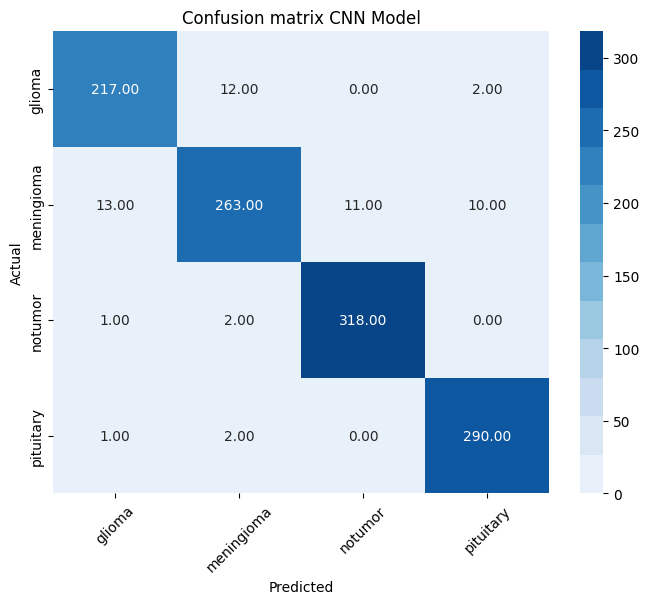

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(classification_report(y_true, y_pred, target_names=val_ds.class_names))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
plt.title('Confusion matrix CNN Model')
sns.heatmap(cm,
            annot=True,
            fmt=".2f",
            cmap=sns.color_palette("Blues",12),
            yticklabels=class_names,
            xticklabels=class_names)

plt.xticks(rotation=45)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
def plot_results(img,pred,actual):
  plt.figure(figsize=(4, 4))
  plt.imshow(img)
  plt.title("Predicted Label: {}, Actual Label: {}".format(pred, actual))
  plt.axis('off')
  plt.show()

1/1 [==============================] - 0s 56ms/step
[[-9.330412  5.601455 20.2425   -4.131874]]


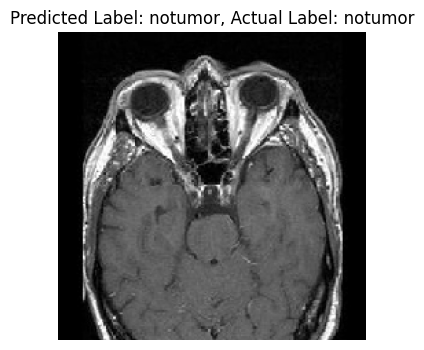

This image most likely belongs to notumor with a 100.00 percent confidence.


In [38]:
test_img_path = "/content/Training/notumor/Tr-noTr_0000.jpg"
img = tf.keras.utils.load_img(test_img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions)
score = tf.nn.softmax(predictions[0])

plot_results(img,class_names[np.argmax(score)],test_img_path.split("/")[3])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)